In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Packages and Files

In [2]:
import pandas as pd
from datetime import datetime
from statistics import mean
import numpy as np
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from operator import itemgetter
from matplotlib import pyplot as plt
import seaborn as sns
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Read in data - Catherine
#articles_df = pd.read_csv('/content/drive/MyDrive/Fall 2021/Break Through AI: USA for UNHCR/articles.csv')
#analytics_df = pd.read_csv('/content/drive/MyDrive/Fall 2021/Break Through AI: USA for UNHCR/analytics.csv')

In [4]:
# Read in data from my drive - Ammran
articles_df = pd.read_csv('/content/drive/MyDrive/Break Through AI: USA for UNHCR/articles.csv')
analytics_df = pd.read_csv('/content/drive/MyDrive/Break Through AI: USA for UNHCR/analytics.csv')

In [5]:
articles_df

,article_id,article_name,keyword,source,authors,publish_date,text,url,wordcount,keyphrases,sentiment,sentiment_mixed,sentiment_positive,sentiment_neutral,sentiment_negative,entities_commercial_item,entities_date,entities_event,entities_location,entities_organization,entities_other,entities_person,entities_quantity,entities_title,processed_date
0,5cb6d46d49f0eacbf1f84d03,AP Interview: Palestinian PM Accuses US of 'Fi...,refugee,New York Times,['The Associated Press'],2019-04-17 07:21:55+00,Shtayyeh laid out a number of proposals for we...,https://www.nytimes.com/aponline/2019/04/17/wo...,807,"Shtayyeh, a number, proposals, the storm, spen...",NEUTRAL,0.005271,0.003001,0.985191,0.006538,NaN,"past two decades, last week",1967 war,"Israel, Jordan, Israel, U.S., east Jerusalem, ...","Palestinians, Israel, Palestinians, Israel, Is...","Palestinian, Palestinian, Palestinian, Arab, E...","Shtayyeh, Shtayyeh, Israeli Prime Minister Ben...","two-state solution, two-state, two-state solution",NaN,2019-04-17
1,5cb83cf249f0eacbf1f8543f,A Meditation on Our Relationship to the Landsc...,refugee,New York Times,['Michael Kimmelman'],2019-04-18 09:00:08+00,"These class conflicts, indicative of “the nati...",https://www.nytimes.com/2019/04/18/books/revie...,1190,"These class conflicts, indicative, the nationa...",NEUTRAL,0.036589,0.008579,0.826013,0.128820,NaN,"today, today",NaN,NaN,NaN,American,"Lessard, Lessard","both, second-home owners, first, billions of l...",NaN,2019-04-18
2,5cb8fed849f0eacbf1f85870,Militia in New Mexico Detains Asylum Seekers a...,refugee,New York Times,['Simon Romero'],2019-04-18 22:47:26+00,“We’re just here to support the Border Patrol ...,https://www.nytimes.com/2019/04/18/us/new-mexi...,974,"the Border Patrol, the public, the reality, th...",NEUTRAL,0.000543,0.000062,0.991873,0.007522,NaN,"March, this week, this week",NaN,"New Mexico, Minnesota, New Mexico, Central Ame...","Border Patrol, Congress, United Constitutional...",NaN,"Benvie, President Trump, Benvie, Benvie, Miche...","43, more than 92,000, about nine miles",NaN,2019-04-18
3,5cb89bfe49f0eacbf1f8563f,Read the Mueller Report: Searchable Document a...,refugee,New York Times,['The New York Times'],2019-04-18 15:45:38+00,U.S. Department of JusticeAttorney Work Produc...,https://www.nytimes.com/interactive/2019/04/18...,0,"U.S. Department, JusticeAttorney Work Product ...",NEUTRAL,0.008909,0.000213,0.772628,0.218250,NaN,"early 2017, January 27, May 3",NaN,"Russia, Russia, Russia, Russia, Russia, Russia...","U.S. Department of JusticeAttorney Work, FBI, ...","Russians, Volume I, Russian, Russian","Crim, Comey, Clinton, McCabe, Comey, Comey, Cl...","both, second time",NaN,2019-04-18
4,85677d64-d3eb-5745-a175-2a5b308e5bf4,Evangelical group says Laos deports 3 American...,refugee,fox-news,Associated Press,2019-04-18 15:04:43+00,A U.S.-based Christian evangelical organizatio...,https://www.foxnews.com/world/evangelical-grou...,287,A U.S.-based Christian evangelical organizatio...,NEUTRAL,0.006400,0.000411,0.878735,0.114454,NaN,"more than a week ago, Thursday night, April 8,...",Easter,"U.S., Laos, Thailand, Casper, Wyoming, Luang N...","Christian, Vision Beyond Borders, Christian, R...","American, Laotian","Eric Blievernicht, Blievernicht, Wayne, Autumn...","three, three, three, two quarters, one",NaN,2019-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15687,c3263e7f-8d74-5b89-a75a-ba23c167919d,Why did Israel raid and wreck a children’s cen...,refugee,al-jazeera-english,Tony Greenstein,2021-07-05 12:45:56+00,"For the past three years, the Brighton Trust, ...",https://www.aljazeera.com/opinions/2021/7/5/wh...,838,"the past three years, the Brighton Trust, the ...",NEUTRAL,0.000214,0.095894,0.902794,0.001097,NaN,"past, 1948, 2002, 2010, January, end of May, M...","Second Intifada, Israeli army","Britain, Jenin, West Bank.The, Israel, Jerusal...","Brighton Trust, National Education Union, Al-T...","Palestini

In [6]:
analytics_df

,Day Index,Users,Ecommerce Conversion Rate,Users: 7-Day Average,Ecommerce Conversion Rate: 7-Day Average
0,4/17/19,"2,815",2.28%,"2,245",4.08%
1,4/18/19,"2,546",4.15%,"2,253",4.19%
2,4/19/19,"1,867",5.72%,"2,331",4.08%
3,4/20/19,"1,529",5.76%,"2,440",3.87%
4,4/21/19,"1,609",5.25%,"2,478",3.84%
...,...,...,...,...,...
807,7/2/21,"1,666",8.88%,"1,655",7.65%
808,7/3/21,"1,455",9.16%,"1,653",7.34%
809,7/4/21,"1,642",8.40%,"1,719",6.73%
810,7/5/21,"1,672",7.79%,"1,757",5.90%


##Cleaning Data

In [7]:
def standardize_date(date):
  split = date.split('-')
  month = split[0]
  day = split[1]
  year = split[2]
  if len(month) == 1:
    month = '0' + month
  if len(day) == 1:
    day = '0' + day
  year = '20' + year
  return year + '-' + month + '-' + day

#2019-04-18
#4-18-19
standardize_date('7-2-21')

'2021-07-02'

In [8]:
#Clean data
analytics_df.rename(columns = {'Day Index':'Date'}, inplace = True)
analytics_df['Users'] = analytics_df['Users'].str.replace(',','').astype(int)
analytics_df['Users: 7-Day Average'] = analytics_df['Users'].astype(int)
analytics_df['Ecommerce Conversion Rate'] = analytics_df['Ecommerce Conversion Rate'].str.replace('%','').astype(float)
analytics_df['Ecommerce Conversion Rate: 7-Day Average'] = analytics_df['Ecommerce Conversion Rate: 7-Day Average'].str.replace('%','').astype(float)
analytics_df['Date'] = analytics_df['Date'].str.replace('/','-')
analytics_df['Date'] = analytics_df['Date'].map(standardize_date)
analytics_df

,Date,Users,Ecommerce Conversion Rate,Users: 7-Day Average,Ecommerce Conversion Rate: 7-Day Average
0,2019-04-17,2815,2.28,2815,4.08
1,2019-04-18,2546,4.15,2546,4.19
2,2019-04-19,1867,5.72,1867,4.08
3,2019-04-20,1529,5.76,1529,3.87
4,2019-04-21,1609,5.25,1609,3.84
...,...,...,...,...,...
807,2021-07-02,1666,8.88,1666,7.65
808,2021-07-03,1455,9.16,1455,7.34
809,2021-07-04,1642,8.40,1642,6.73
810,2021-07-05,1672,7.79,1672,5.90


In [9]:
'''x = []
y = []
n = 10
k = Counter(vocab)

for a,b in k.most_common(n):
  x.append(a)
  y.append(b)
sns.barplot(x=y, y=x)
print(k.most_common()[-1])'''

'x = []\ny = []\nn = 10\nk = Counter(vocab)\n\nfor a,b in k.most_common(n):\n  x.append(a)\n  y.append(b)\nsns.barplot(x=y, y=x)\nprint(k.most_common()[-1])'

In [10]:
#Calculate the average number of users
avg_users = mean(analytics_df['Users'])
print(avg_users)

#Calculate the average ecommerce rate 
avg_ecomm = mean(analytics_df['Ecommerce Conversion Rate'])
print(avg_ecomm)

#Add the difference in ecommerce and change in users to the dataframe
analytics_df['Change in Users'] = analytics_df['Users: 7-Day Average'] - avg_users
analytics_df['Change in Ecommerce'] = analytics_df['Ecommerce Conversion Rate: 7-Day Average'] - avg_ecomm
analytics_df

4340.0394088669955
4.648817733990148


,Date,Users,Ecommerce Conversion Rate,Users: 7-Day Average,Ecommerce Conversion Rate: 7-Day Average,Change in Users,Change in Ecommerce
0,2019-04-17,2815,2.28,2815,4.08,-1525.039409,-0.568818
1,2019-04-18,2546,4.15,2546,4.19,-1794.039409,-0.458818
2,2019-04-19,1867,5.72,1867,4.08,-2473.039409,-0.568818
3,2019-04-20,1529,5.76,1529,3.87,-2811.039409,-0.778818
4,2019-04-21,1609,5.25,1609,3.84,-2731.039409,-0.808818
...,...,...,...,...,...,...,...
807,2021-07-02,1666,8.88,1666,7.65,-2674.039409,3.001182
808,2021-07-03,1455,9.16,1455,7.34,-2885.039409,2.691182
809,2021-07-04,1642,8.40,1642,6.73,-2698.039409,2.081182
810,2021-07-05,1672,7.79,1672,5.90,-2668.039409,1.251182


In [ ]:
#Cleaning the articles' text
def lemmatize_text(text):
  new_text = ''
  word_list = text.split(" ")                     #split into a list of words
  for word in word_list:
    word = WordNetLemmatizer().lemmatize(word,'v')#lemmatize OR STEMMING
    #USE TOKENIZER -> huggingface, nltk
    if word not in stop_words:                    #remove stopwords
      new_text += (word + " ")
  return new_text

stop_words = stopwords.words('english')
punctuation= '''!()-'[]{},;:'"\,<>./?@#$%^&*_~–'''

articles_df['text'] = articles_df['text'].str.lower()               #Make lowercase
articles_df['text'] = articles_df['text'].str.replace('[^\w\s]',' ') #Remove punctuation
articles_df['text'] = articles_df['text'].apply(lemmatize_text)     #Lemmatize and remove stopwords

#Test code
#print(articles_df['text'][0])
#print(lemmatize_text(articles_df['text'][0]))

In [ ]:
'''#Creating a dictionary of cleaned words from the articles
vocab = {}
target = "-"
for text in articles_df['text']:
  for word in text.split():
    if word in vocab:
      vocab[word] += 1
    else:
      vocab[word] = 1

    if(word.find(target) != -1):
      print(word)'''

'#Creating a dictionary of cleaned words from the articles\nvocab = {}\ntarget = "-"\nfor text in articles_df[\'text\']:\n  for word in text.split():\n    if word in vocab:\n      vocab[word] += 1\n    else:\n      vocab[word] = 1\n\n    if(word.find(target) != -1):\n      print(word)'

In [ ]:
#Creating a dictionary of cleaned words from the articles
vocab = {}

for text in articles_df['text']:
  for word in text.split():
    if word in vocab:
      vocab[word] += 1
    else:
      vocab[word] = 1

In [ ]:
'''x = []
y = []
n = 10
k = Counter(vocab)

for a,b in k.most_common(n):
  x.append(a)
  y.append(b)
sns.barplot(x=y, y=x)
print(k.most_common()[-100])'''

'x = []\ny = []\nn = 10\nk = Counter(vocab)\n\nfor a,b in k.most_common(n):\n  x.append(a)\n  y.append(b)\nsns.barplot(x=y, y=x)\nprint(k.most_common()[-100])'

In [ ]:
'''oneoff = 0
for c in k.most_common():
  if(c[1] <= 2):
      oneoff +=1
print(oneoff)'''

'oneoff = 0\nfor c in k.most_common():\n  if(c[1] <= 2):\n      oneoff +=1\nprint(oneoff)'

In [ ]:
articles_df['article_name'].map(str)

0        AP Interview: Palestinian PM Accuses US of 'Fi...
1        A Meditation on Our Relationship to the Landsc...
2        Militia in New Mexico Detains Asylum Seekers a...
3        Read the Mueller Report: Searchable Document a...
4        Evangelical group says Laos deports 3 American...
                               ...                        
15687    Why did Israel raid and wreck a children’s cen...
15688    News24.com | WATCH | Over 60 migrants feared d...
15689    UK seeks new powers to curb cross-Channel migr...
15690    Tibetan spiritual leader Dalai Lama celebrates...
15691    Borders Bill: Post-Brexit overhaul of asylum r...
Name: article_name, Length: 15692, dtype: object

##Descriptive Statistics

In [ ]:
articles_df.head()

,article_id,article_name,keyword,source,authors,publish_date,text,url,wordcount,keyphrases,sentiment,sentiment_mixed,sentiment_positive,sentiment_neutral,sentiment_negative,entities_commercial_item,entities_date,entities_event,entities_location,entities_organization,entities_other,entities_person,entities_quantity,entities_title,processed_date
0,5cb6d46d49f0eacbf1f84d03,AP Interview: Palestinian PM Accuses US of 'Fi...,refugee,New York Times,['The Associated Press'],2019-04-17 07:21:55+00,shtayyeh lay number proposals weather storm s...,https://www.nytimes.com/aponline/2019/04/17/wo...,807,"Shtayyeh, a number, proposals, the storm, spen...",NEUTRAL,0.005271,0.003001,0.985191,0.006538,NaN,"past two decades, last week",1967 war,"Israel, Jordan, Israel, U.S., east Jerusalem, ...","Palestinians, Israel, Palestinians, Israel, Is...","Palestinian, Palestinian, Palestinian, Arab, E...","Shtayyeh, Shtayyeh, Israeli Prime Minister Ben...","two-state solution, two-state, two-state solution",NaN,2019-04-17
1,5cb83cf249f0eacbf1f8543f,A Meditation on Our Relationship to the Landsc...,refugee,New York Times,['Michael Kimmelman'],2019-04-18 09:00:08+00,class conflict indicative national blue red ...,https://www.nytimes.com/2019/04/18/books/revie...,1190,"These class conflicts, indicative, the nationa...",NEUTRAL,0.036589,0.008579,0.826013,0.128820,NaN,"today, today",NaN,NaN,NaN,American,"Lessard, Lessard","both, second-home owners, first, billions of l...",NaN,2019-04-18
2,5cb8fed849f0eacbf1f85870,Militia in New Mexico Detains Asylum Seekers a...,refugee,New York Times,['Simon Romero'],2019-04-18 22:47:26+00,support border patrol show public reality bor...,https://www.nytimes.com/2019/04/18/us/new-mexi...,974,"the Border Patrol, the public, the reality, th...",NEUTRAL,0.000543,0.000062,0.991873,0.007522,NaN,"March, this week, this week",NaN,"New Mexico, Minnesota, New Mexico, Central Ame...","Border Patrol, Congress, United Constitutional...",NaN,"Benvie, President Trump, Benvie, Benvie, Miche...","43, more than 92,000, about nine miles",NaN,2019-04-18
3,5cb89bfe49f0eacbf1f8563f,Read the Mueller Report: Searchable Document a...,refugee,New York Times,['The New York Times'],2019-04-18 15:45:38+00,u department justiceattorney work product ...,https://www.nytimes.com/interactive/2019/04/18...,0,"U.S. Department, JusticeAttorney Work Product ...",NEUTRAL,0.008909,0.000213,0.772628,0.218250,NaN,"early 2017, January 27, May 3",NaN,"Russia, Russia, Russia, Russia, Russia, Russia...","U.S. Department of JusticeAttorney Work, FBI, ...","Russians, Volume I, Russian, Russian","Crim, Comey, Clinton, McCabe, Comey, Comey, Cl...","both, second time",NaN,2019-04-18
4,85677d64-d3eb-5745-a175-2a5b308e5bf4,Evangelical group says Laos deports 3 American...,refugee,fox-news,Associated Press,2019-04-18 15:04:43+00,u base christian evangelical organization say...,https://www.foxnews.com/world/evangelical-grou...,287,A U.S.-based Christian evangelical organizatio...,NEUTRAL,0.006400,0.000411,0.878735,0.114454,NaN,"more than a week ago, Thursday night, April 8,...",Easter,"U.S., Laos, Thailand, Casper, Wyoming, Luang N...","Christian, Vision Beyond Borders, Christian, R...","American, Laotian","Eric Blievernicht, Blievernicht, Wayne, Autumn...","three, three, three, two quarters, one",NaN,2019-04-18


In [ ]:
# Identifying the n most common words
n = 100
k = Counter(vocab)
top_n_words = []
for pair in k.most_common(n):
  top_n_words.append(pair[0])
print(top_n_words)

['say', 'people', 'state', 'u', 'refugee', 'trump', 'refugees', 'would', 'one', 'year', 'government', 'border', 'also', 'new', 'make', 'take', 'country', 'children', 'president', 'go', 'tell', 'time', '000', 'right', 'camp', 'two', 'work', 'report', 'group', 'us', 'migrants', 'come', 'last', 'years', 'many', 'live', 'include', 'get', 'back', 'home', 'call', 'asylum', 'first', 'unite', 'house', 'force', 'leave', 'could', 'like', 'world', 'immigration', 'administration', 'know', 'since', 'case', 'see', 'need', 'biden', 'help', 'want', 'war', 'even', 'accord', 'number', 'may', 'use', 'support', 'health', 'million', 'family', 'police', 'syria', 'find', 'international', 'security', 'give', 'countries', 'turkey', 'kill', 'hold', 'officials', 'three', 'al', 'day', 'news', 'military', 'plan', 'attack', '1', 'myanmar', 'return', 'flee', 'rohingya', 'court', 'think', 'city', 'coronavirus', 'show', 'week', 'agency']


In [ ]:
n = 20
top_n_words = []
for pair in k.most_common(n):
  top_n_words.append(pair[0])
print(top_n_words)
print(k.most_common(n))

['say', 'people', 'state', 'u', 'refugee', 'trump', 'refugees', 'would', 'one', 'year', 'government', 'border', 'also', 'new', 'make', 'take', 'country', 'children', 'president', 'go']
[('say', 107885), ('people', 40958), ('state', 29673), ('u', 28294), ('refugee', 28074), ('trump', 27670), ('refugees', 27229), ('would', 24819), ('one', 24584), ('year', 23311), ('government', 23084), ('border', 22116), ('also', 21803), ('new', 21638), ('make', 21472), ('take', 21209), ('country', 20727), ('children', 20249), ('president', 19726), ('go', 18821)]


('8zno6toisg', 1)


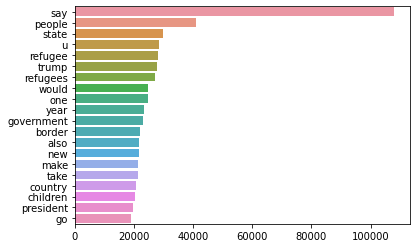

In [ ]:
x = []
y = []
for a,b in k.most_common(n):
  x.append(a)
  y.append(b)
sns.barplot(x=y, y=x)
print(k.most_common()[-1])

In [ ]:
combined = 0
for c in k.most_common():
  if(c[1] <= 2):
      combined +=1
print(combined)

52768


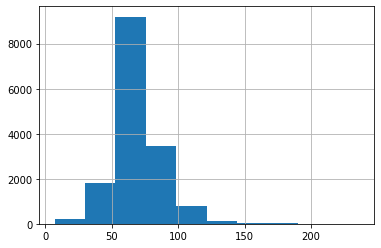

In [ ]:
#length of titles (characters)
articles_df['article_name'].str.len().hist()

In [ ]:
num_words = []
for a in articles_df['article_name']:
  tmp = str(a).split()
  x = len(tmp)
  num_words.append(x)

(array([2.020e+02, 3.230e+03, 8.504e+03, 2.957e+03, 5.550e+02, 1.650e+02,
        5.200e+01, 1.500e+01, 9.000e+00, 3.000e+00]),
 array([ 1. ,  4.8,  8.6, 12.4, 16.2, 20. , 23.8, 27.6, 31.4, 35.2, 39. ]),
 <a list of 10 Patch objects>)

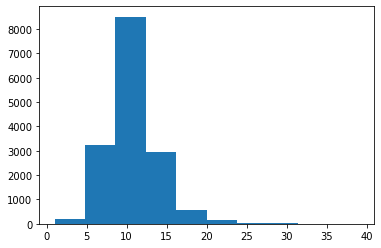

In [ ]:
plt.hist(num_words)

##Exploratory Data Analysis (can rename and/or make subgroups for different analysis)

In [ ]:
#Creates a new dataframe with only articles containing a given word
#This can be made more efficient by getting rid of adding the article text, which we don't need– though it may be nice to have later!
def articles_containing(word):
  contains_df = pd.DataFrame(columns = ['article_id', 'article_name', 'keyword', 'source', 'authors',
       'publish_date', 'text', 'url', 'wordcount', 'keyphrases', 'sentiment',
       'sentiment_mixed', 'sentiment_positive', 'sentiment_neutral',
       'sentiment_negative', 'entities_commercial_item', 'entities_date',
       'entities_event', 'entities_location', 'entities_organization',
       'entities_other', 'entities_person', 'entities_quantity',
       'entities_title', 'processed_date'])
  for article in articles_df.iterrows():
    article = article[1]
    if (word in article['text'].split()):
      contains_df = contains_df.append(article)
  return contains_df

#Test code
#contains_trump_df = articles_containing('trump')
#contains_weather_df = articles_containing('weather')

In [ ]:
#Creates a list of dates on which articles containing a given word were published 
def dates_containing(word):
  dates = []
  for article in articles_df.iterrows():
    article = article[1]
    if (word in article['text'].split()):
      dates.append(article['processed_date'])
  return dates

In [ ]:
#Get publication dates of all articles containing a given word for the top 100 words
dates_by_word = {}
for word in top_n_words:
  #print(word)
  dates_by_word[word] = dates_containing(word)

#for word in dates_by_word.keys():
  #print(word)
  #print(dates_by_word[word])

In [ ]:
#Calculate the change in user rate and change in ecom rate for each of the most popular words
user_rate = {}
ecom_rate = {}

for word in dates_by_word.keys():
  #print(word)
  dates = dates_by_word[word]
  user_change = []
  ecom_change = []

  #Filter analysis_df by date 
  for date in dates:
    #Locate date in analysis_df
    if (not analytics_df[analytics_df['Date'] == date].empty):
      row = analytics_df[analytics_df['Date'] == date].iloc[0]
      user_change.append(row['Change in Users'])
      ecom_change.append(row['Change in Ecommerce'])
  user_rate[word] = mean(user_change)
  ecom_rate[word] = mean(ecom_change)

print(user_rate)
print(ecom_rate)

{'say': 196.61403028644366, 'people': 255.960777613191, 'state': 186.19968798386608, 'u': 196.75638787077114, 'refugee': 211.19524709971577, 'trump': 134.93303708467897, 'refugees': 318.8288419977962, 'would': 193.5107537248388, 'one': 224.7094960826322, 'year': 229.9990658447296, 'government': 285.84733534877853, 'border': 247.7031569783741, 'also': 257.769897999259, 'new': 239.51279470068553, 'make': 242.62423285368808, 'take': 198.96658186432586, 'country': 279.6783779878133, 'children': 275.36299579203137, 'president': 138.41651333928542, 'go': 228.07334451138289}
{'say': -0.31751996797015974, 'people': -0.3067664519388659, 'state': -0.2513501166401777, 'u': -0.27944822332515423, 'refugee': -0.23869438728187037, 'trump': -0.36401485141278467, 'refugees': -0.28454039905256334, 'would': -0.3835112182729373, 'one': -0.349760572360713, 'year': -0.3553801269573817, 'government': -0.30566676888724625, 'border': -0.12644050374375884, 'also': -0.25552345044529495, 'new': -0.349897219824355

In [ ]:
top_n_user_rate_words = dict(sorted(user_rate.items(), key = itemgetter(1), reverse = True)[:25])
top_n_ecom_rate_words = dict(sorted(ecom_rate.items(), key = itemgetter(1), reverse = True)[:25])
print("Top words for high user rates:")
print(top_n_user_rate_words.keys())
print("Top words for high ecommerce rates:")
print(top_n_ecom_rate_words.keys())

Top words for high user rates:
dict_keys(['refugees', 'government', 'country', 'children', 'also', 'people', 'border', 'make', 'new', 'year', 'go', 'one', 'refugee', 'take', 'u', 'say', 'would', 'state', 'president', 'trump'])
Top words for high ecommerce rates:
dict_keys(['border', 'president', 'refugee', 'state', 'also', 'children', 'u', 'refugees', 'government', 'people', 'take', 'say', 'make', 'one', 'new', 'year', 'country', 'trump', 'go', 'would'])


In [ ]:
#Creating a dictionary of cleaned words from specific articles

def make_vocab(df):
  vocab = {}
  for text in df['text']:
    for word in text.split():
      if word in vocab:
        vocab[word] += 1
      else:
        vocab[word] = 1
  return vocab

In [ ]:
#split by sentiment
positives = articles_df[articles_df['sentiment'] == 'POSITIVE']
neutrals = articles_df[articles_df['sentiment'] == 'NEUTRAL']
negatives = articles_df[articles_df['sentiment'] == 'NEGATIVE']

In [ ]:
from wordcloud import WordCloud 

def wordclouds(df):
  newdf = " ".join(review for review in df.text)
  word_cloud = WordCloud(stopwords=stop_words).generate(newdf)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.savefig('wordcloud33.png')
  plt.show()


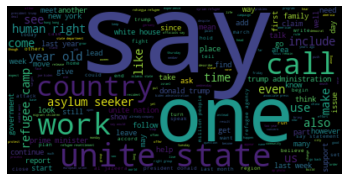

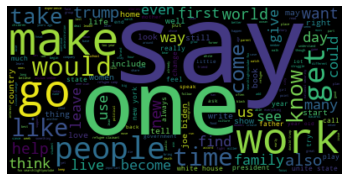

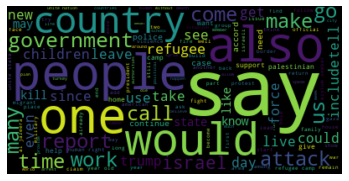

In [ ]:
wordclouds(neutrals)
wordclouds(positives)
wordclouds(negatives)

In [ ]:
pos_vocab = make_vocab(positives)
neu_vocab = make_vocab(neutrals)
neg_vocab = make_vocab(negatives)

In [ ]:
# Identifying the n most common words in any df

def top_words(n, df):
  k = Counter(df)
  top_n_words = []
  for pair in k.most_common(n):
    top_n_words.append(pair[0])
  return top_n_words

In [ ]:
pos_top_words = top_words(10, pos_vocab)
neu_top_words = top_words(10, neu_vocab)
neg_top_words = top_words(10, neg_vocab)
print(pos_top_words)
print(neu_top_words)
print(neg_top_words)

['say', 'people', 'one', 'make', 'new', 'time', 'like', 'know', 'go', 'trump']
['say', 'people', 'state', 'u', 'refugee', 'trump', 'refugees', 'would', 'one', 'year']
['say', 'people', 'camp', 'refugee', 'children', 'government', 'one', 'refugees', 'state', 'u']


In [ ]:
for x in pos_top_words:
  if x in neg_top_words:
    pos_top_words.remove(x)
    neg_top_words.remove(x)
print(neu_top_words)
print(pos_top_words)
print(neg_top_words)

['say', 'people', 'state', 'u', 'refugee', 'trump', 'refugees', 'would', 'one', 'year']
['people', 'make', 'new', 'time', 'like', 'know', 'go', 'trump']
['people', 'camp', 'refugee', 'children', 'government', 'refugees', 'state', 'u']


In [ ]:
#Get publication dates of all articles containing a given word for the top 100 words
dates_by_word = {}
for word in pos_top_words:
  #print(word)
  dates_by_word[word] = dates_containing(word)

#for word in dates_by_word.keys():
  #print(word)
  #print(dates_by_word[word])

In [ ]:
#Calculate the change in user rate and change in ecom rate for each of the most popular words
user_rate = {}
ecom_rate = {}

for word in dates_by_word.keys():
  #print(word)
  dates = dates_by_word[word]
  user_change = []
  ecom_change = []

  #Filter analysis_df by date 
  for date in dates:
    #Locate date in analysis_df
    if (not analytics_df[analytics_df['Date'] == date].empty):
      row = analytics_df[analytics_df['Date'] == date].iloc[0]
      user_change.append(row['Change in Users'])
      ecom_change.append(row['Change in Ecommerce'])
  user_rate[word] = mean(user_change)
  ecom_rate[word] = mean(ecom_change)

print(user_rate)
print(ecom_rate)

{'people': 255.960777613191, 'make': 242.62423285368808, 'new': 239.51279470068553, 'time': 251.43098897521625, 'like': 250.92060535017174, 'know': 245.32247550131288, 'go': 228.07334451138289, 'trump': 134.93303708467897}
{'people': -0.3067664519388659, 'make': -0.3315342926230295, 'new': -0.34989721982435573, 'time': -0.31340303405757886, 'like': -0.36235603148437223, 'know': -0.31731345133490174, 'go': -0.36823637137753534, 'trump': -0.36401485141278467}


In [ ]:
#Get publication dates of all articles containing a given word for the top 100 words
dates_by_word = {}
for word in neg_top_words:
  #print(word)
  dates_by_word[word] = dates_containing(word)

#for word in dates_by_word.keys():
  #print(word)
  #print(dates_by_word[word])

In [ ]:
#Calculate the change in user rate and change in ecom rate for each of the most popular words
user_rate = {}
ecom_rate = {}

for word in dates_by_word.keys():
  #print(word)
  dates = dates_by_word[word]
  user_change = []
  ecom_change = []

  #Filter analysis_df by date 
  for date in dates:
    #Locate date in analysis_df
    if (not analytics_df[analytics_df['Date'] == date].empty):
      row = analytics_df[analytics_df['Date'] == date].iloc[0]
      user_change.append(row['Change in Users'])
      ecom_change.append(row['Change in Ecommerce'])
  user_rate[word] = mean(user_change)
  ecom_rate[word] = mean(ecom_change)

print(user_rate)
print(ecom_rate)

{'people': 255.960777613191, 'camp': 378.89818511796693, 'refugee': 211.19524709971577, 'children': 275.36299579203137, 'government': 285.84733534877853, 'refugees': 318.8288419977962, 'state': 186.19968798386608, 'u': 196.75638787077114}
{'people': -0.3067664519388659, 'camp': -0.30165607985480963, 'refugee': -0.23869438728187037, 'children': -0.2598096558387296, 'government': -0.30566676888724625, 'refugees': -0.28454039905256334, 'state': -0.2513501166401777, 'u': -0.27944822332515423}


In [ ]:
#Get publication dates of all articles containing a given word for the top 100 words
dates_by_word = {}
for word in neu_top_words:
  #print(word)
  dates_by_word[word] = dates_containing(word)

#for word in dates_by_word.keys():
  #print(word)
  #print(dates_by_word[word])

#Sentiment analysis plots

In [ ]:
#Calculate the change in user rate and change in ecom rate for each of the most popular words
user_rate = {}
ecom_rate = {}

for word in dates_by_word.keys():
  #print(word)
  dates = dates_by_word[word]
  user_change = []
  ecom_change = []

  #Filter analysis_df by date 
  for date in dates:
    #Locate date in analysis_df
    if (not analytics_df[analytics_df['Date'] == date].empty):
      row = analytics_df[analytics_df['Date'] == date].iloc[0]
      user_change.append(row['Change in Users'])
      ecom_change.append(row['Change in Ecommerce'])
  user_rate[word] = mean(user_change)
  ecom_rate[word] = mean(ecom_change)

print(user_rate)
print(ecom_rate)

{'say': 196.61403028644366, 'people': 255.960777613191, 'state': 186.19968798386608, 'u': 196.75638787077114, 'refugee': 211.19524709971577, 'trump': 134.93303708467897, 'refugees': 318.8288419977962, 'would': 193.5107537248388, 'one': 224.7094960826322, 'year': 229.9990658447296}
{'say': -0.31751996797015974, 'people': -0.3067664519388659, 'state': -0.2513501166401777, 'u': -0.27944822332515423, 'refugee': -0.23869438728187037, 'trump': -0.36401485141278467, 'refugees': -0.28454039905256334, 'would': -0.3835112182729373, 'one': -0.349760572360713, 'year': -0.3553801269573817}


In [ ]:
#Calculate how well the sentiment analysis score predicts the user/ecommerce rate
grouped = articles_df.groupby('processed_date')
av_pos = grouped['sentiment_positive'].mean()
av_neu = grouped['sentiment_neutral'].mean()
av_neg = grouped['sentiment_negative'].mean()

#match the dates df with the sentiment analysis df by date
sentiment_df = pd.DataFrame()
sentiment_df['Date'] = np.array(av_pos.keys())
sentiment_df['Positive'] = np.array(av_pos)
sentiment_df['Neutral'] = np.array(av_neu)
sentiment_df['Negative'] = np.array(av_neg)

sentiment_df = sentiment_df.merge(analytics_df, on='Date')

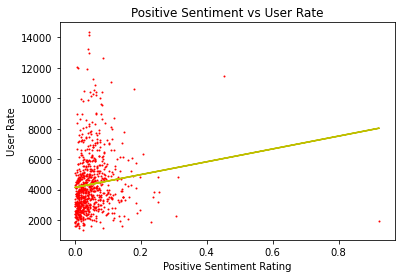

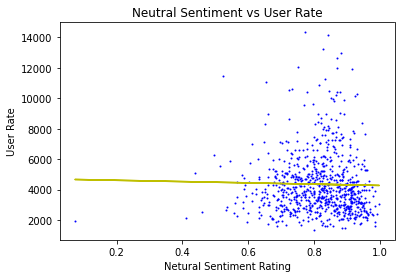

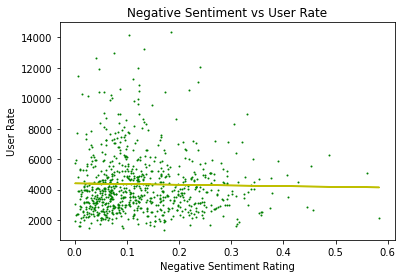

In [ ]:
#Graph user rates

#plot positive sentiment vs user rate
plt.plot(sentiment_df['Positive'], sentiment_df['Users: 7-Day Average'], 'ro', markersize=1)
plt.title('Positive Sentiment vs User Rate')
plt.xlabel('Positive Sentiment Rating')
plt.ylabel('User Rate')
m, b = np.polyfit(sentiment_df['Positive'], sentiment_df['Users: 7-Day Average'], 1)
plt.plot(sentiment_df['Positive'], m*sentiment_df['Positive']+b, 'y')
plt.show()

#plot neutral sentiment vs user rate
plt.plot(sentiment_df['Neutral'], sentiment_df['Users: 7-Day Average'], 'bo', markersize=1)
plt.title('Neutral Sentiment vs User Rate')
plt.xlabel('Netural Sentiment Rating')
plt.ylabel('User Rate')
m, b = np.polyfit(sentiment_df['Neutral'], sentiment_df['Users: 7-Day Average'], 1)
plt.plot(sentiment_df['Neutral'], m*sentiment_df['Neutral']+b, 'y')
plt.show()

#plot negative sentiment vs user rate
plt.plot(sentiment_df['Negative'], sentiment_df['Users: 7-Day Average'], 'go', markersize=1)
plt.title('Negative Sentiment vs User Rate')
plt.xlabel('Negative Sentiment Rating')
plt.ylabel('User Rate')
m, b = np.polyfit(sentiment_df['Negative'], sentiment_df['Users: 7-Day Average'], 1)
plt.plot(sentiment_df['Negative'], m*sentiment_df['Negative']+b, 'y')
plt.show()

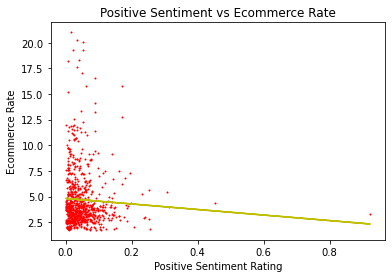

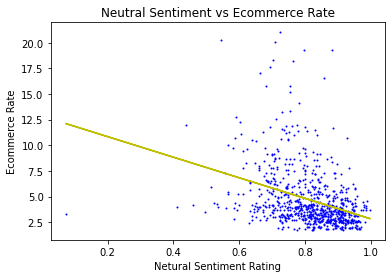

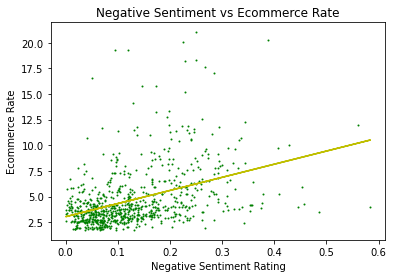

In [ ]:
#Graph Ecommerce Rates

#plot positive sentiment vs ecommerce rate
plt.plot(sentiment_df['Positive'], sentiment_df['Ecommerce Conversion Rate: 7-Day Average'], 'ro', markersize=1)
plt.title('Positive Sentiment vs Ecommerce Rate')
plt.xlabel('Positive Sentiment Rating')
plt.ylabel('Ecommerce Rate')
m, b = np.polyfit(sentiment_df['Positive'], sentiment_df['Ecommerce Conversion Rate: 7-Day Average'], 1)
plt.plot(sentiment_df['Positive'], m*sentiment_df['Positive']+b, 'y')
plt.show()

#plot neutral sentiment vs ecommerce rate
plt.plot(sentiment_df['Neutral'], sentiment_df['Ecommerce Conversion Rate: 7-Day Average'], 'bo', markersize=1)
plt.title('Neutral Sentiment vs Ecommerce Rate')
plt.xlabel('Netural Sentiment Rating')
plt.ylabel('Ecommerce Rate')
m, b = np.polyfit(sentiment_df['Neutral'], sentiment_df['Ecommerce Conversion Rate: 7-Day Average'], 1)
plt.plot(sentiment_df['Neutral'], m*sentiment_df['Neutral']+b, 'y')
plt.show()

#plot negative sentiment vs ecommerce rate
plt.plot(sentiment_df['Negative'], sentiment_df['Ecommerce Conversion Rate: 7-Day Average'], 'go', markersize=1)
plt.title('Negative Sentiment vs Ecommerce Rate')
plt.xlabel('Negative Sentiment Rating')
plt.ylabel('Ecommerce Rate')
m, b = np.polyfit(sentiment_df['Negative'], sentiment_df['Ecommerce Conversion Rate: 7-Day Average'], 1)
plt.plot(sentiment_df['Negative'], m*sentiment_df['Negative']+b, 'y')
plt.show()

In [ ]:
#Calculate correlation
from scipy.stats import spearmanr
corr, _ = spearmanr(sentiment_df['Positive'], sentiment_df['Users: 7-Day Average'])
print('Correlation for positive sentiment and user rate:\n %.3f' % corr)
corr, _ = spearmanr(sentiment_df['Neutral'], sentiment_df['Users: 7-Day Average'])
print('Correlation for netural sentiment and user rate:\n %.3f' % corr)
corr, _ = spearmanr(sentiment_df['Negative'], sentiment_df['Users: 7-Day Average'])
print('Correlation for negative sentiment and user rate:\n %.3f' % corr)
corr, _ = spearmanr(sentiment_df['Positive'], sentiment_df['Ecommerce Conversion Rate: 7-Day Average'])
print('Correlation for positive sentiment and ecommerce rate:\n %.3f' % corr)
corr, _ = spearmanr(sentiment_df['Neutral'], sentiment_df['Ecommerce Conversion Rate: 7-Day Average'])
print('Correlation for neutral sentiment and ecommerce rate:\n %.3f' % corr)
corr, _ = spearmanr(sentiment_df['Negative'], sentiment_df['Ecommerce Conversion Rate: 7-Day Average'])
print('Correlation for negative sentiment and ecommerce rate:\n %.3f' % corr)

Correlation for positive sentiment and user rate:
 0.278
Correlation for netural sentiment and user rate:
 -0.089
Correlation for negative sentiment and user rate:
 0.042
Correlation for positive sentiment and ecommerce rate:
 -0.039
Correlation for neutral sentiment and ecommerce rate:
 -0.415
Correlation for negative sentiment and ecommerce rate:
 0.437


See how many positive or negative articles from each publisher
Value counts

#Topic Modeling

##imports

In [ ]:
!pip install bertopic
from bertopic import BERTopic

In [ ]:
articles_df

,article_id,article_name,keyword,source,authors,publish_date,text,url,wordcount,keyphrases,sentiment,sentiment_mixed,sentiment_positive,sentiment_neutral,sentiment_negative,entities_commercial_item,entities_date,entities_event,entities_location,entities_organization,entities_other,entities_person,entities_quantity,entities_title,processed_date
0,5cb6d46d49f0eacbf1f84d03,AP Interview: Palestinian PM Accuses US of 'Fi...,refugee,New York Times,['The Associated Press'],2019-04-17 07:21:55+00,shtayyeh lay number proposals weather storm s...,https://www.nytimes.com/aponline/2019/04/17/wo...,807,"Shtayyeh, a number, proposals, the storm, spen...",NEUTRAL,0.005271,0.003001,0.985191,0.006538,NaN,"past two decades, last week",1967 war,"Israel, Jordan, Israel, U.S., east Jerusalem, ...","Palestinians, Israel, Palestinians, Israel, Is...","Palestinian, Palestinian, Palestinian, Arab, E...","Shtayyeh, Shtayyeh, Israeli Prime Minister Ben...","two-state solution, two-state, two-state solution",NaN,2019-04-17
1,5cb83cf249f0eacbf1f8543f,A Meditation on Our Relationship to the Landsc...,refugee,New York Times,['Michael Kimmelman'],2019-04-18 09:00:08+00,class conflict indicative national blue red ...,https://www.nytimes.com/2019/04/18/books/revie...,1190,"These class conflicts, indicative, the nationa...",NEUTRAL,0.036589,0.008579,0.826013,0.128820,NaN,"today, today",NaN,NaN,NaN,American,"Lessard, Lessard","both, second-home owners, first, billions of l...",NaN,2019-04-18
2,5cb8fed849f0eacbf1f85870,Militia in New Mexico Detains Asylum Seekers a...,refugee,New York Times,['Simon Romero'],2019-04-18 22:47:26+00,support border patrol show public reality bor...,https://www.nytimes.com/2019/04/18/us/new-mexi...,974,"the Border Patrol, the public, the reality, th...",NEUTRAL,0.000543,0.000062,0.991873,0.007522,NaN,"March, this week, this week",NaN,"New Mexico, Minnesota, New Mexico, Central Ame...","Border Patrol, Congress, United Constitutional...",NaN,"Benvie, President Trump, Benvie, Benvie, Miche...","43, more than 92,000, about nine miles",NaN,2019-04-18
3,5cb89bfe49f0eacbf1f8563f,Read the Mueller Report: Searchable Document a...,refugee,New York Times,['The New York Times'],2019-04-18 15:45:38+00,u department justiceattorney work product ...,https://www.nytimes.com/interactive/2019/04/18...,0,"U.S. Department, JusticeAttorney Work Product ...",NEUTRAL,0.008909,0.000213,0.772628,0.218250,NaN,"early 2017, January 27, May 3",NaN,"Russia, Russia, Russia, Russia, Russia, Russia...","U.S. Department of JusticeAttorney Work, FBI, ...","Russians, Volume I, Russian, Russian","Crim, Comey, Clinton, McCabe, Comey, Comey, Cl...","both, second time",NaN,2019-04-18
4,85677d64-d3eb-5745-a175-2a5b308e5bf4,Evangelical group says Laos deports 3 American...,refugee,fox-news,Associated Press,2019-04-18 15:04:43+00,u base christian evangelical organization say...,https://www.foxnews.com/world/evangelical-grou...,287,A U.S.-based Christian evangelical organizatio...,NEUTRAL,0.006400,0.000411,0.878735,0.114454,NaN,"more than a week ago, Thursday night, April 8,...",Easter,"U.S., Laos, Thailand, Casper, Wyoming, Luang N...","Christian, Vision Beyond Borders, Christian, R...","American, Laotian","Eric Blievernicht, Blievernicht, Wayne, Autumn...","three, three, three, two quarters, one",NaN,2019-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15687,c3263e7f-8d74-5b89-a75a-ba23c167919d,Why did Israel raid and wreck a children’s cen...,refugee,al-jazeera-english,Tony Greenstein,2021-07-05 12:45:56+00,past three years brighton trust charity trus...,https://www.aljazeera.com/opinions/2021/7/5/wh...,838,"the past three years, the Brighton Trust, the ...",NEUTRAL,0.000214,0.095894,0.902794,0.001097,NaN,"past, 1948, 2002, 2010, January, end of May, M...","Second Intifada, Israeli army","Britain, Jenin, West Bank.The, Israel, Jerusal...","Brighton Trust, National Education Union, Al-T...","Palestinian, Israeli, Pa

##modeling

In [ ]:
content = articles_df['text']
content

0        shtayyeh lay number proposals weather storm  s...
1        class conflict  indicative  national blue red ...
2         support border patrol show public reality bor...
3        u  department justiceattorney work product    ...
4        u  base christian evangelical organization say...
                               ...                        
15687    past three years  brighton trust  charity trus...
15688    two european bind vessels migrants sink sea tu...
15689    file   thursday  jan  21  2021 file photo brit...
15690    tibetan spiritual leader dalai lama celebrate ...
15691    power bill require agreement countries make wo...
Name: text, Length: 15692, dtype: object

In [ ]:
model = BERTopic(top_n_words = 20,
                 nr_topics = 5,
                 n_gram_range = (1, 2),
                 min_topic_size = 30,
                 verbose=True)

In [ ]:
topics = model.fit(content)

Batches:   0%|          | 0/491 [00:00<?, ?it/s]

2021-12-06 18:17:10,123 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-12-06 18:17:53,848 - BERTopic - Reduced dimensionality with UMAP
2021-12-06 18:17:54,660 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
topics.get_topic_info()